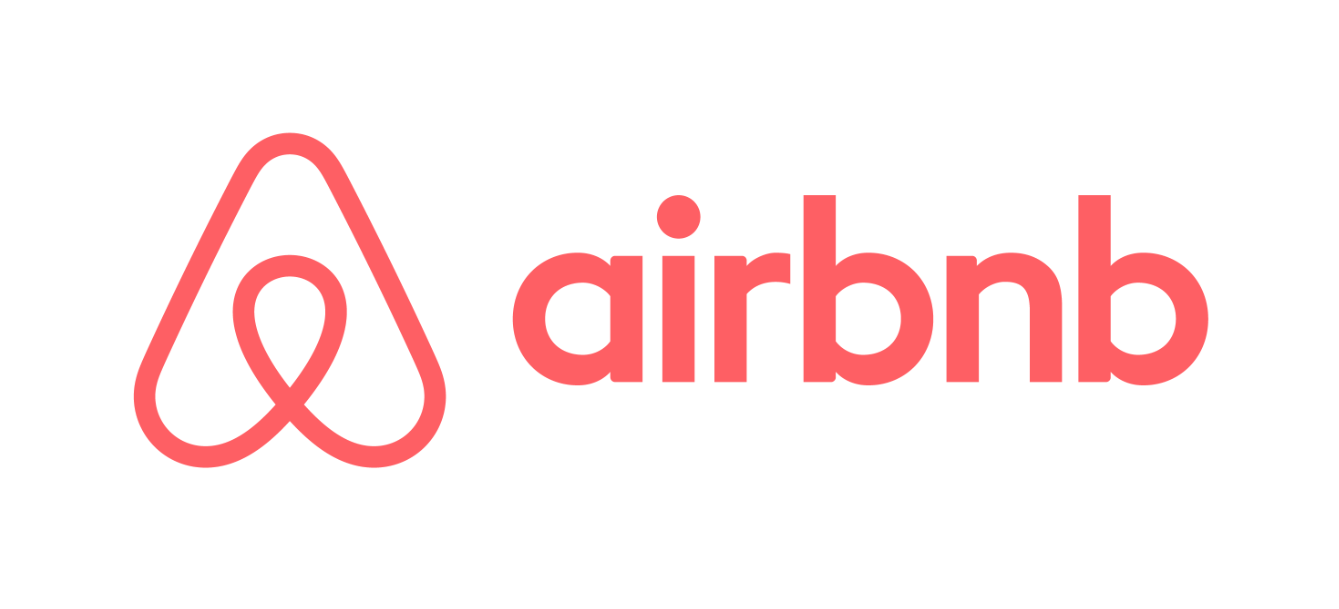


<h1><center><font color='#fe5f64'>                        Project 1 Regression  </center></h2>

<h1> Business Problem </h1>

There are no machine learning problems but there are business problem which we solve through the help of machine learning.
One such problem we are working on as a part of regression project is predicting the prices of home based on features.
For this project we will do data preprocessing, data vizualization and predictive modelling

For this problem we have the following features

1. id : Unique ID assigned to listing
2. name : Name of the listing
3. host_id : Unique ID assigned to a host who has listed 
4. host_name : Name of the host
5. neighbourhood_group : Location of the listing in New York City
6. neighbourhood : Area of that Location in New York City
7. latitude: Latitude of the listing
8. longitude: Longitude of the listing
9. room_type: Room Type of the listing(Private/Apartment ect)
10. price: Price of the lisiting
11. minimum_nights: Minimum number of nights that listing one has to rent
12. number_of_reviews : Total number of reviews available
13. last_review : Last review posted date
14. reviews_per_month : Number of reviews evey month
15. calculated_host_listings_count : 
16. availability_365 : Number of days the listing is available instead of 365 days


### Loading the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

import warnings 
warnings.filterwarnings("ignore")

In [2]:
Airbnb_data=pd.read_csv("AB_NYC_2019.csv")
#Airbnb_data=Airbnb_data[:2000]

In [3]:
Airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/18,0.10,1,0


In [4]:
Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 16 columns):
id                                3820 non-null int64
name                              3818 non-null object
host_id                           3820 non-null int64
host_name                         3818 non-null object
neighbourhood_group               3820 non-null object
neighbourhood                     3820 non-null object
latitude                          3820 non-null float64
longitude                         3820 non-null float64
room_type                         3820 non-null object
price                             3820 non-null int64
minimum_nights                    3820 non-null int64
number_of_reviews                 3820 non-null int64
last_review                       3508 non-null object
reviews_per_month                 3508 non-null float64
calculated_host_listings_count    3820 non-null int64
availability_365                  3820 non-null int64
dtypes: float64(3

In [5]:
Airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.820000e+03,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3508.000000,3820.000000,3820.000000
mean,9.940870e+05,3.802313e+06,40.728974,-73.961498,178.687173,8.962304,62.275393,0.926052,2.294764,152.036387
std,7.011164e+05,3.422126e+06,0.050708,0.035775,280.929882,28.644659,80.252061,1.088315,5.513869,137.703879
min,2.539000e+03,2.571000e+03,40.508680,-74.239860,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.729980e+05,8.731560e+05,40.689260,-73.984805,84.000000,2.000000,7.000000,0.170000,1.000000,0.000000
50%,8.435115e+05,2.712353e+06,40.723570,-73.961225,125.000000,3.000000,28.000000,0.500000,1.000000,144.000000
75%,1.628258e+06,6.131986e+06,40.761653,-73.945568,195.000000,5.000000,88.000000,1.310000,2.000000,284.000000
max,2.303436e+06,1.731875e+07,40.908040,-73.733230,6500.000000,1000.000000,607.000000,10.000000,52.000000,365.000000


<b> By using info we have all the information about the dataset, we know that our dataset has 48895 observations and 16 features, out of which 6 are categorical features

In [6]:
missing_values_count=Airbnb_data.isnull().sum()
missing_values_count

id                                  0
name                                2
host_id                             0
host_name                           2
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       312
reviews_per_month                 312
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [7]:
# Getting the total number of cells which means multiplying both rows and columns
total_cells = np.product(Airbnb_data.shape)
total_missing = missing_values_count.sum()

In [8]:
(total_missing/total_cells) * 100

1.0274869109947644

In [9]:
Airbnb_data.shape

(3820, 16)

In [10]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
Airbnb_data.drop(['host_id','id','host_name','last_review','name','neighbourhood'], axis=1, inplace=True)

In [11]:
Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 10 columns):
neighbourhood_group               3820 non-null object
latitude                          3820 non-null float64
longitude                         3820 non-null float64
room_type                         3820 non-null object
price                             3820 non-null int64
minimum_nights                    3820 non-null int64
number_of_reviews                 3820 non-null int64
reviews_per_month                 3508 non-null float64
calculated_host_listings_count    3820 non-null int64
availability_365                  3820 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 298.6+ KB


<b> From above we can see that we only have 2.57 % of missing values in the dataset as per project requirements we need to have missing values between 5 to 10%, so we will introduce the missing values
    
   ** To be Removed **
    The approach I followed is mentioned here https://www.thetopsites.net/article/54330454.shtml For shubhi

In [12]:
# Calculate the missing value values in each of the column 
Airbnb_data_price=Airbnb_data["price"]

Airbnb_data=Airbnb_data.drop("price",axis=1,inplace=False)
for col in Airbnb_data:
    ori_rat = Airbnb_data[col].isna().mean()
    print("{} : {}".format(col, ori_rat))

    if ori_rat >= 0.06: continue

    add_miss_rat = (0.06 - ori_rat) / (1 - ori_rat)
    vals_to_nan = Airbnb_data[col].dropna().sample(frac=add_miss_rat).index
    Airbnb_data.loc[vals_to_nan, col] = np.NaN


neighbourhood_group : 0.0
latitude : 0.0
longitude : 0.0
room_type : 0.0
minimum_nights : 0.0
number_of_reviews : 0.0
reviews_per_month : 0.08167539267015707
calculated_host_listings_count : 0.0
availability_365 : 0.0


In [13]:
Airbnb_data["price"]=Airbnb_data_price
Airbnb_data.head
missing_values_count=Airbnb_data.isnull().sum()
missing_values_count

neighbourhood_group               229
latitude                          229
longitude                         229
room_type                         229
minimum_nights                    229
number_of_reviews                 229
reviews_per_month                 312
calculated_host_listings_count    229
availability_365                  229
price                               0
dtype: int64

In [14]:
total_cells = np.product(Airbnb_data.shape)
total_missing = missing_values_count.sum()

In [15]:
(total_missing/total_cells) * 100

5.612565445026179

<b> We have introduced missing values which is now 5.50%. Now we can proceed towards Exploratory Data Analysis

In [16]:
Airbnb_data.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,40.64749,-73.97237,Private room,1.0,9.0,0.21,NaN,365.0,149
1,Manhattan,40.75362,-73.98377,Entire home/apt,1.0,45.0,0.38,2.0,355.0,225
2,Manhattan,40.80902,-73.94190,Private room,NaN,0.0,NaN,1.0,365.0,150
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1.0,270.0,4.64,1.0,194.0,89
4,Manhattan,40.79851,-73.94399,Entire home/apt,10.0,9.0,0.10,1.0,0.0,80


To start with our EDA now we have to impute missing values so that we get a clear idea of what is in the data but before that we need to take of the missing values in the dataset for continuous features we can usee methods like knn 

Categorical Values

1.Delete the rows/columns in the dataset -This can work in the case if there are million rows and the there are 2-3% 
missing values, but it is not a very good option for small datsets as we can lose a lot of information 

2.Replace the missing value with most frequently occuring category but that can lead to class imbalance within the categories

3.Predict the classify to classify 

In [17]:
Airbnb_data.shape

(3820, 10)

In [18]:
Airbnb_data["neighbourhood_group"] = Airbnb_data["neighbourhood_group"].fillna(Airbnb_data["neighbourhood_group"].value_counts().index[0])
Airbnb_data["room_type"] = Airbnb_data["room_type"].fillna(Airbnb_data["room_type"].value_counts().index[0])

In [19]:
Airbnb_KNN=Airbnb_data.drop(['neighbourhood_group','room_type','price'], axis=1)
imputer = KNNImputer(n_neighbors=5)
knn_imputation_results=imputer.fit_transform(Airbnb_KNN)

In [20]:
Airbnb_final_data=pd.DataFrame(knn_imputation_results)
Airbnb_final_data.columns=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
Airbnb_final_data["neighbourhood_group"]=Airbnb_data["neighbourhood_group"]
Airbnb_final_data["room_type"]=Airbnb_data["room_type"]
Airbnb_final_data["price"]=Airbnb_data["price"]


In [21]:
Airbnb_final_data

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,40.64749,-73.97237,1.0,9.0,0.210,2.2,365.0,Brooklyn,Private room,149
1,40.75362,-73.98377,1.0,45.0,0.380,2.0,355.0,Manhattan,Entire home/apt,225
2,40.80902,-73.94190,21.4,0.0,1.040,1.0,365.0,Manhattan,Private room,150
3,40.68514,-73.95976,1.0,270.0,4.640,1.0,194.0,Brooklyn,Entire home/apt,89
4,40.79851,-73.94399,10.0,9.0,0.100,1.0,0.0,Manhattan,Entire home/apt,80
...,...,...,...,...,...,...,...,...,...,...
3815,40.72988,-73.85773,3.0,33.0,0.770,5.0,262.0,Queens,Entire home/apt,88
3816,40.76774,-73.98503,1.0,0.0,0.068,1.0,0.0,Manhattan,Entire home/apt,425
3817,40.76096,-73.98646,2.0,1.0,0.020,1.0,0.0,Manhattan,Entire home/apt,975
3818,40.67262,-73.97351,10.0,8.0,0.120,1.0,30.0,Brooklyn,Entire home/apt,305


<h1> Exploratory Data Analysis
    

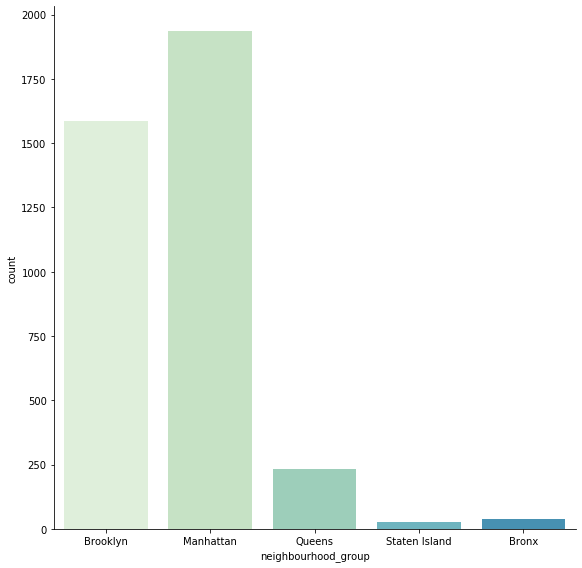

In [22]:
sns.set_palette("GnBu")
sns.catplot(x="neighbourhood_group",data=Airbnb_final_data, kind="count", height=8)

We have total 5 neighbourhood areas
From the above plot we can see the number of lisitngs are more in the neighbourhood Brooklyn and Manhattan as compared to to the other three.
Three can be two reason 
1. We do not have enough data for the other neighbourhoods
2. Manhattan and Brooklyn are popular destinations in New York City, so it obvious that more number of lisitings will be available in that area


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

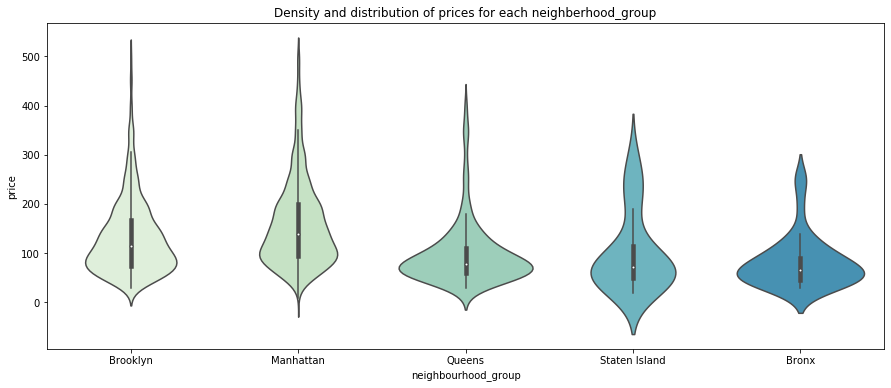

In [23]:
plt.figure(figsize=(15,6))
sub_6=Airbnb_final_data[Airbnb_final_data.price < 500]
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

Text(0, 0.5, 'Count')

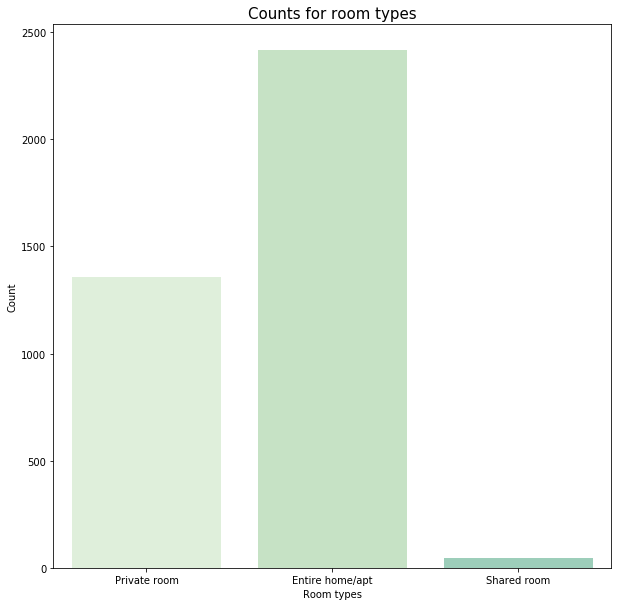

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data=Airbnb_final_data, x='room_type')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

We have data where the listings have room type more of Entire home/apt as compared to the other two.

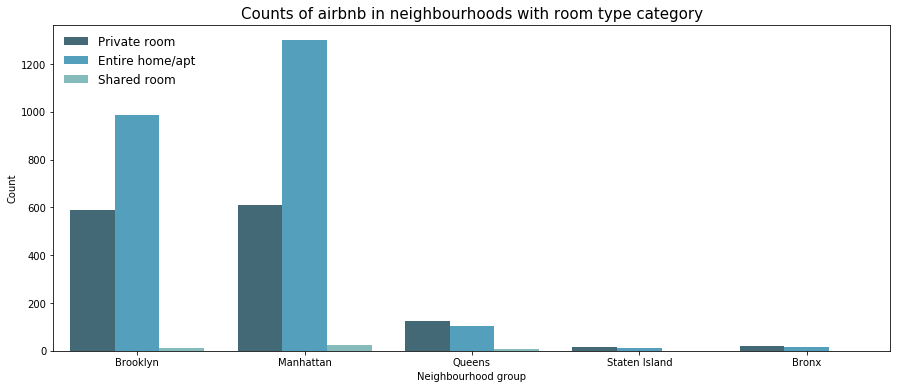

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data=Airbnb_final_data, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Now we wanted to figure the relationship between the room typr and neighbourhood
From above vizualization we can get the following insights
1. People have hardly rented the lisitings which are of room type Shared
2. Few people who have rented the listing with room type as Shared and we can see that it is in the area Manhattan, Brooklyn and Queens, and mostly in Manhattan because Manhattan is expensive as compared to Brooklyn and then Queens
3. People prefer Entire Apartment as compared to Private room and shared room

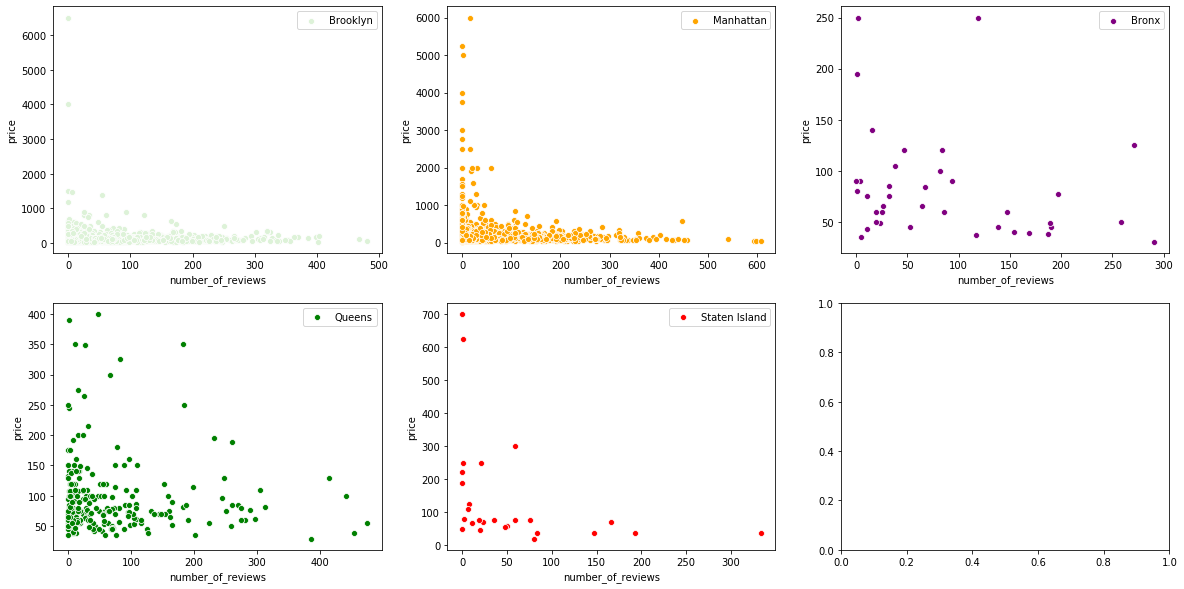

In [26]:
df2= Airbnb_final_data.groupby('neighbourhood_group')
fig, ax = plt.subplots(2,3,figsize =(20,10))
ax = ax.flatten().T
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Brooklyn'),ax = ax[0], label ='Brooklyn')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Manhattan'),ax = ax[1],color = 'orange',label ='Manhattan')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Bronx'),ax = ax[2],color = 'purple',label ='Bronx')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Queens'),ax = ax[3],color = 'g',label ='Queens')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Staten Island'),ax = ax[4],color = 'r',label ='Staten Island')

We wanted to check if there is any correlation between the number pf reviews and price, we have grouped the data according
to neighbourhood and check the correlation and unfortunately there is no correlation between these.
What we would expect in real life is , we would not only consider the number of reviews alone but would also take into 
the account the if the reviews are good or bad.


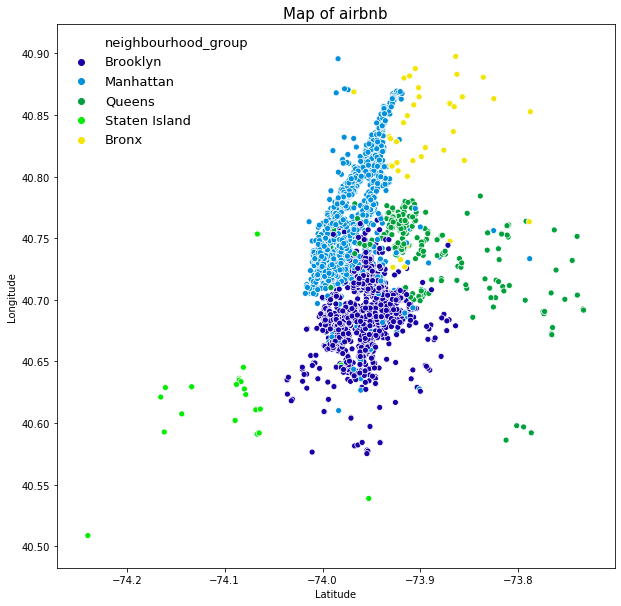

In [27]:
sns.set_palette("nipy_spectral")
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=Airbnb_final_data, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

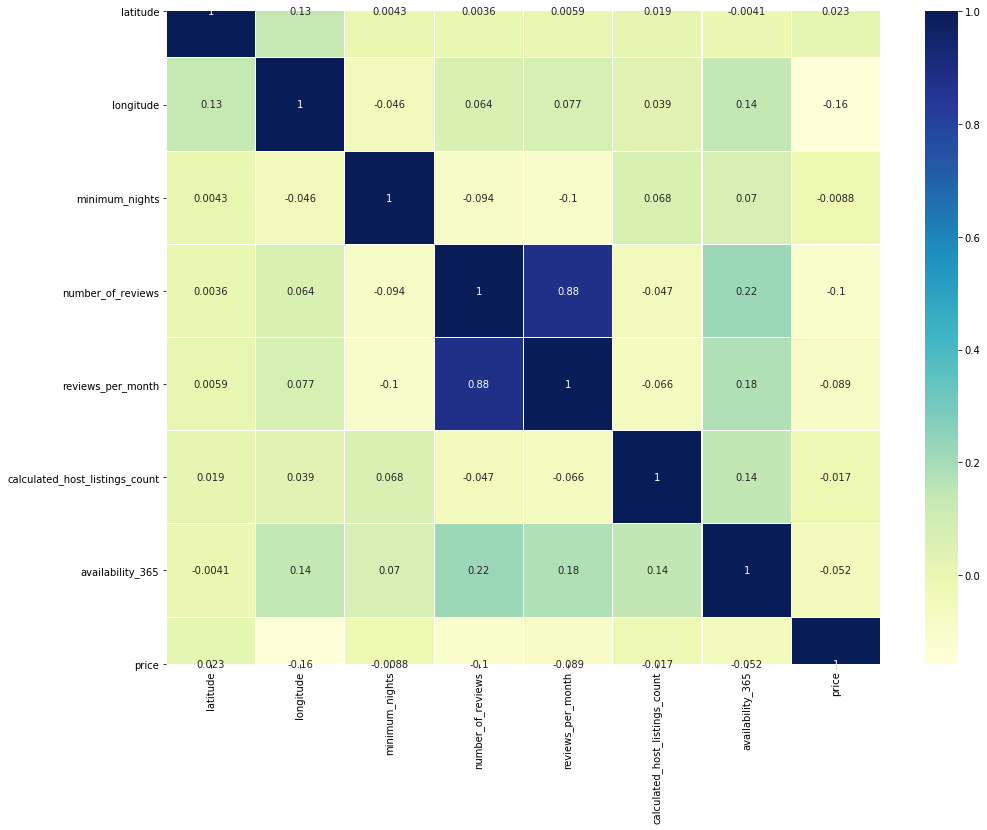

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(Airbnb_final_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

We can see from the heat map that there is no perfect corrleation (1) between any predictors, so we are go to proceed
with our analysis

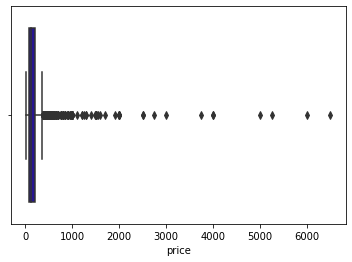

In [29]:
sns.boxplot(x= Airbnb_final_data['price'])

From boxplot we can see that there are many many outliers, and the range is also less now let us check the distribution of the price

Text(0.5, 1.0, 'Price Distribution Plot')

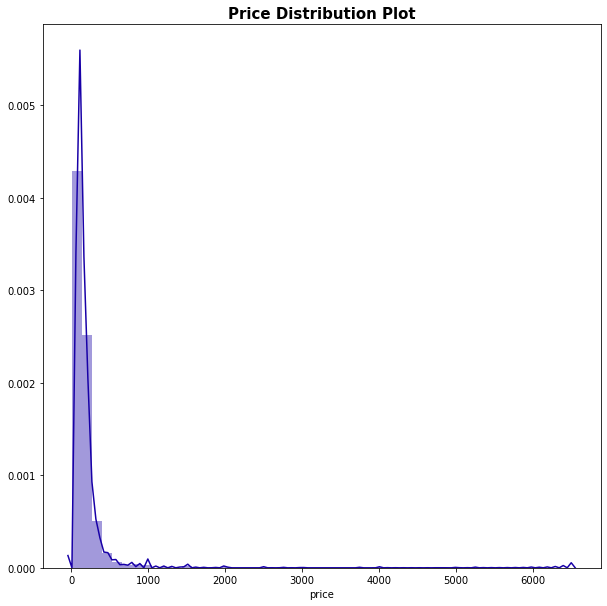

In [30]:
plt.figure(figsize=(10,10))
sns.distplot(Airbnb_final_data['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

The price distribution is not normal distribution it is highly skewed which confirms the prescene of outliers

In [31]:
cols = pd.get_dummies(Airbnb_final_data['neighbourhood_group'], prefix= 'neighbourhood_group')
Airbnb_final_data[cols.columns] = cols
Airbnb_final_data.drop('neighbourhood_group', axis = 1, inplace = True)

In [32]:
cols = pd.get_dummies(Airbnb_final_data['room_type'], prefix= 'room_type_')
Airbnb_final_data[cols.columns] = cols
Airbnb_final_data.drop('room_type', axis = 1, inplace = True)

In [33]:
y=Airbnb_final_data.price
X=Airbnb_final_data.drop(["price"],axis=1)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [34]:
Airbnb_final_data.shape

(3820, 16)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Linear Regression 

In [36]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
scores = cross_val_score(lreg,X_train,y_train,cv=5,scoring='r2')
print(' Linear regression Train Cross Validation score Score: ', np.mean(scores))
scores = cross_val_score(lreg,X_test,y_test,cv=5,scoring='r2')
print(' Linear regression Test Cross Validation score Score:  ', np.mean(scores))

 Linear regression Train Cross Validation score Score:  0.07695388971607649
 Linear regression Test Cross Validation score Score:   0.1334196711869706


In [37]:
pred = lreg.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.105


## Ridge

In [38]:
ridge_gs_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 15]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_gs_params, cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1,
                                   5, 10, 15]},
             scoring='r2')

In [39]:
print("\nBest tuning parameter obtained from grid search: " ,ridge_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(ridge_grid_search.best_score_))


Best tuning parameter obtained from grid search:  {'alpha': 15}
Best cross-validation score: 0.08


In [40]:
pred = ridge_grid_search.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.105


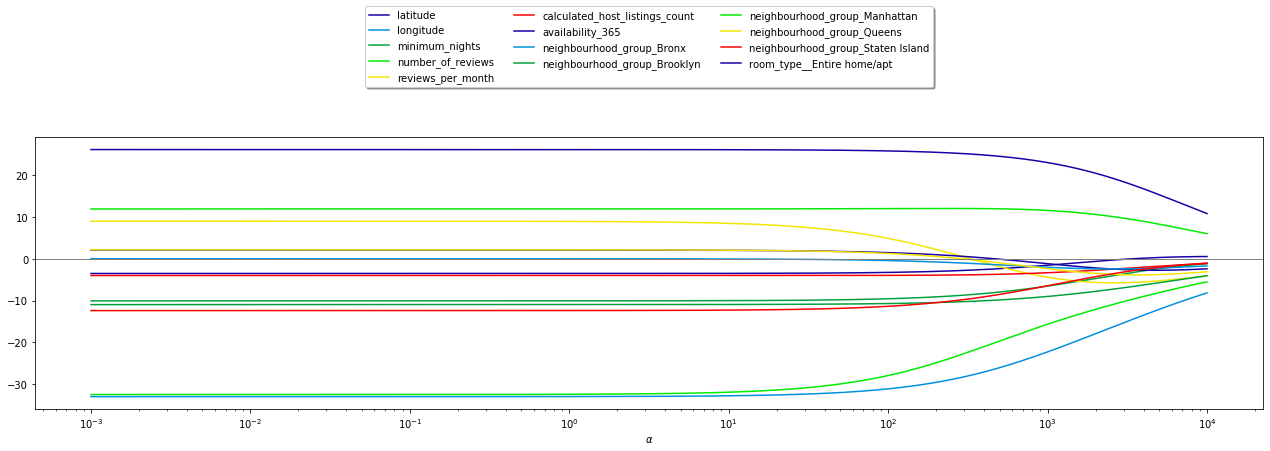

In [41]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (22,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso

In [43]:
#Lasso Regression
#Taking range of Alpha values with 5 fold cross validation to find the best parameter
lasso_gs_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 7, 10]}

lasso_gridsearch = GridSearchCV(Lasso(), lasso_gs_params, cv=5,  scoring='r2')
lasso_gridsearch.fit(X_train, y_train)

print("\n The Best tuning parameter from lasso search: " ,lasso_gridsearch.best_params_)
print("Best cross-validation score: {:.2f}".format(lasso_gridsearch.best_score_))


 The Best tuning parameter from lasso search:  {'alpha': 0.5}
Best cross-validation score: 0.08


In [44]:
pred = lasso_gridsearch.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.104


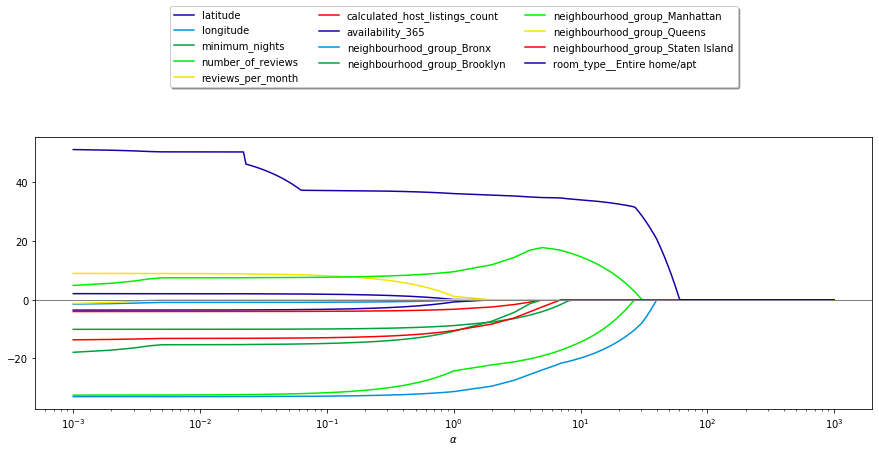

In [45]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Polynomial Regression

In [61]:
#CHANGE PRICE TO NORMAL DISTRIBUTION USING LOG
y_price = y > 0
y_price['price'] = np.log(y + 1)
y_price = y.values.reshape(-1,1)

X_reviews = X['minimum_nights'].values.reshape(-1,1)

In [62]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_reviews)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_price)

LinearRegression()

Text(0, 0.5, '$y$')

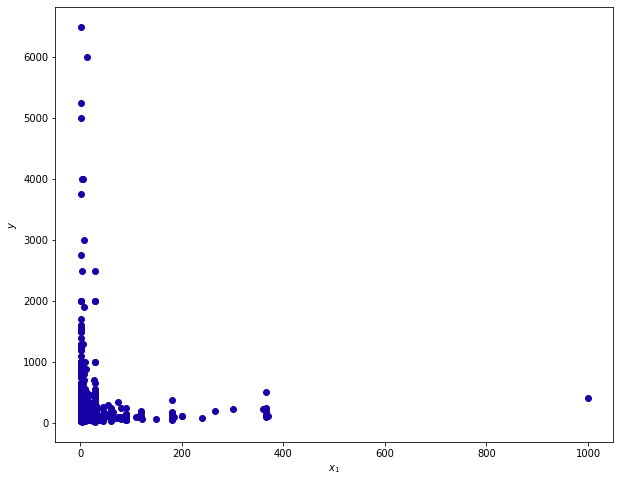

In [63]:
%matplotlib inline

plt.subplots(figsize = (10,8))
plt.scatter(X_reviews, y_price)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

Text(0, 0.5, '$y$')

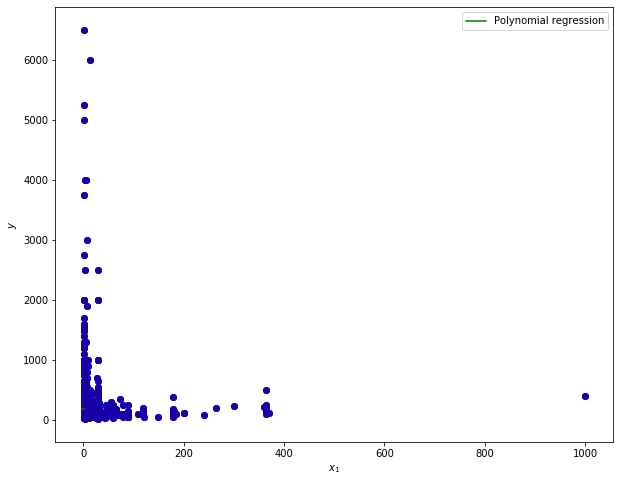

In [64]:
x_axis = np.linspace(-3,3, 100).reshape(-1,1)
plt.subplots(figsize = (10,8))
plt.scatter(X_reviews, y_price, c = 'b')
#plt.plot(x_axis, lreg.predict(x_axis), c = 'r', label = 'Linear regression')
plt.plot(x_axis , poly_reg.predict(poly.transform(x_axis)), c = 'g', label = 'Polynomial regression')
plt.scatter(X_reviews, y_price)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$y$')

# KNN

In [46]:
knn_param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10] ,'weights' : ['uniform','distance'] }
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='r2')
knn_gridsearch.fit(X_train, y_train)

print("The Best tuning parameter from Grid search: " ,knn_gridsearch.best_params_)
print("Best cross-validation score: {:.2f}".format(knn_gridsearch.best_score_))

The Best tuning parameter from Grid search:  {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validation score: 0.06


In [47]:
pred = knn_gridsearch.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.062


## Decision Tree

In [48]:
param_grid = { 'max_depth' : [4,5,6,7,8,9,10] , 'max_features' : [3,4,5,6,7,8,9,10,11,12,13,14] }
dtree_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5,scoring='r2')
dtree_grid_search.fit(X_train, y_train)
print("The Best tuning parameter from Grid search: " ,dtree_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(dtree_grid_search.best_score_))

The Best tuning parameter from Grid search:  {'max_depth': 4, 'max_features': 13}
Best cross-validation score: 0.13


In [49]:
pred = dtree_grid_search.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.189


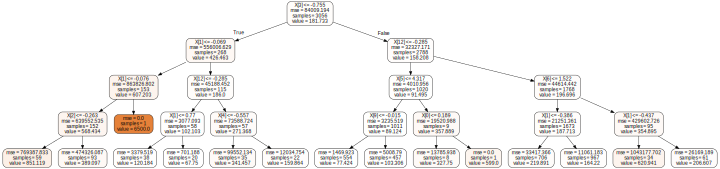

In [50]:
import os 
import graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree_grid_search.best_estimator_, out_file=None, filled=True, rounded=True) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"10,10!"')

# Draw graph
graph = graphviz.Source(pydot_graph.to_string())

# Show graph
graph 

## SVM without kernel trick

In [51]:
# create and fit a ridge regression model, testing each alpha
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
SVR_grid_search = GridSearchCV(SVR(), param_grid=param_grid,scoring ="r2")
SVR_grid_search.fit(X_train,y_train)
print("The Best tuning parameter from Grid search: " ,SVR_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(SVR_grid_search.best_score_))

The Best tuning parameter from Grid search:  {'C': 100}
Best cross-validation score: 0.06


In [52]:
pred = SVR_grid_search.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.093


## SVM with kernel trick

In [53]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
SVR_grid_poly = GridSearchCV(SVR(kernel="poly"), param_grid=param_grid,scoring ="r2")
SVR_grid_poly.fit(X_train,y_train)
print("The Best tuning parameter from Grid search: " ,SVR_grid_poly.best_params_)
print("Best cross-validation score: {:.2f}".format(SVR_grid_poly.best_score_))

The Best tuning parameter from Grid search:  {'C': 10}
Best cross-validation score: 0.02


In [54]:
pred = SVR_grid_poly.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.056


In [55]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
SVR_grid_rbf = GridSearchCV(SVR(kernel="rbf"), param_grid=param_grid,scoring ="r2")
SVR_grid_rbf.fit(X_train,y_train)
print("The best score of Grid search for Simple SVM is ",SVR_grid_rbf.best_score_)
print("The best estimator of Grid search for Simple SVM is ",SVR_grid_rbf.best_estimator_)

The best score of Grid search for Simple SVM is  0.05583434368433169
The best estimator of Grid search for Simple SVM is  SVR(C=100)


In [56]:
pred = SVR_grid_rbf.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.093


In [57]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
model = SVR(kernel="linear")
SVR_grid_linear = GridSearchCV(estimator=model, param_grid=param_grid,scoring ="r2")
SVR_grid_linear.fit(X_train,y_train)
print("The Best tuning parameter from Grid search: " ,SVR_grid_linear.best_params_)
print("Best cross-validation score: {:.2f}".format(SVR_grid_linear.best_score_))

The Best tuning parameter from Grid search:  {'C': 100}
Best cross-validation score: 0.03


In [58]:
pred = SVR_grid_linear.predict(X_test)
print("R2 Score for test is: {:.3f}".format(r2_score(y_test, pred)))

R2 Score for test is: 0.065


In [60]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "R2 Score"]

x.add_row(["Linear Regression", 0.105])
x.add_row(["Ridge", 0.105])
x.add_row(["Lasso", 0.104])
x.add_row(["KNN", 0.062])
x.add_row(["Decision Tree", 0.189])
x.add_row(["SVM without kernel", 0.093])
x.add_row(["SVM with Kernel", 0.065])
print(x)

+--------------------+----------+
|       Model        | R2 Score |
+--------------------+----------+
| Linear Regression  |  0.105   |
|       Ridge        |  0.105   |
|       Lasso        |  0.104   |
|        KNN         |  0.062   |
|   Decision Tree    |  0.189   |
| SVM without kernel |  0.093   |
|  SVM with Kernel   |  0.065   |
+--------------------+----------+


### Conclusion:
#### Here we find that the decision tree has the highest R2 score hence hence is the best model for predicting the house prices.